Analysis on Used Vehicle Price in the UK
===



### Objectives

- Visualise the data to see what factors have highest impacts on vehicle prices (mileage, age, make, engine type, engine size, segment).
- Visualise the price depreciation of the three different OEMs - Audi, BMW and Mercedes-Benz across D, E and F sectors. 
- Build models to predict the price trend using linear regression and polynomial regression and test the accuracy of the models.

### Duration
- 10th March 2021 to 21st March 2021

### Source

- Used cars prices: 
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing and Exploring Dataset

In [2]:
bmw = pd.read_csv("bmw.csv")
bmw.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


In [3]:
bmw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
bmw.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [5]:
bmw['make'] = 'BMW'
bmw['age'] = 2021 - bmw.year
bmw.loc[bmw['model'] == ' 3 Series', 'segment'] = 'D'
bmw.loc[bmw['model'] == ' 5 Series', 'segment'] = 'E'
bmw.loc[bmw['model'] == ' 7 Series', 'segment'] = 'F'

bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,age,segment
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,BMW,7,E
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,BMW,3,NaN
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,BMW,5,E
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,BMW,4,NaN
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,BMW,7,F


In [6]:
bmw.dropna(inplace=True)
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,age,segment
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,BMW,7,E
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,BMW,5,E
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,BMW,7,F
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0,BMW,5,E
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0,BMW,4,E


Duplicating the process for mercedes and audi datasets.

In [7]:
#Mercedes Data Manipulation

merc = pd.read_csv("merc.csv")
merc['make'] = 'Mercedes'
merc['age'] = 2021 - merc.year

merc.loc[merc['model'] == ' C Class', 'segment'] = 'D'
merc.loc[merc['model'] == ' E Class', 'segment'] = 'E'
merc.loc[merc['model'] == ' S Class', 'segment'] = 'F'

merc.dropna(inplace = True)
merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,age,segment
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,Mercedes,4,F
7,S Class,2012,10948,Automatic,107000,Petrol,265,36.7,3.5,Mercedes,9,F
16,C Class,2017,19890,Automatic,30281,Diesel,150,60.1,2.1,Mercedes,4,D
19,C Class,2014,15701,Automatic,20498,Diesel,20,64.2,2.1,Mercedes,7,D
20,C Class,2019,26601,Automatic,9949,Diesel,150,64.2,2.0,Mercedes,2,D


In [8]:
#Audi Data Manipulation

audi = pd.read_csv("audi.csv")
audi['make'] = 'Audi'
audi['age'] = 2021 - audi.year

audi.loc[audi['model'] == ' A4', 'segment'] = 'D'
audi.loc[audi['model'] == ' A6', 'segment'] = 'E'
audi.loc[audi['model'] == ' A8', 'segment'] = 'F'

audi.dropna(inplace = True)
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,age,segment
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi,5,E
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi,4,D
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0,Audi,5,E
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0,Audi,5,D
11,A6,2016,16500,Automatic,52198,Diesel,125,57.6,2.0,Audi,5,E


Merging separate dataframes into one

In [9]:
df = pd.concat([bmw, merc, audi], ignore_index=True)
df.drop(['model', 'year'], axis=1, inplace=True)

df.head()

,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,age,segment
0,11200,Automatic,67068,Diesel,125,57.6,2.0,BMW,7,E
1,16000,Automatic,62794,Diesel,160,51.4,3.0,BMW,5,E
2,14500,Automatic,39554,Diesel,160,50.4,3.0,BMW,7,F
3,14900,Automatic,35309,Diesel,125,60.1,2.0,BMW,5,E
4,16000,Automatic,38538,Diesel,125,60.1,2.0,BMW,4,E


### Exploratory Data Analysis

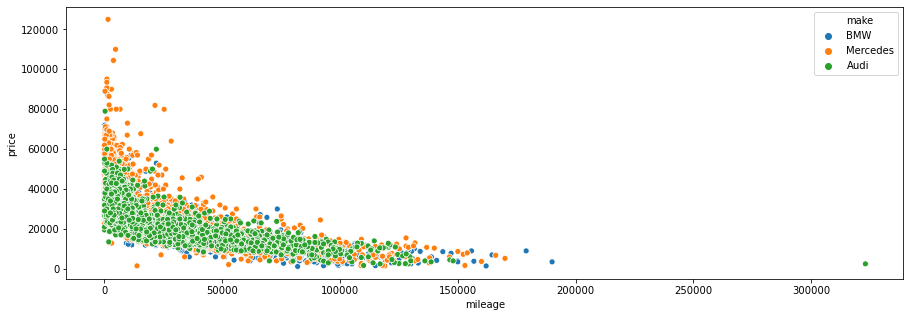

In [10]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(df["mileage"], df["price"], hue = df["make"])

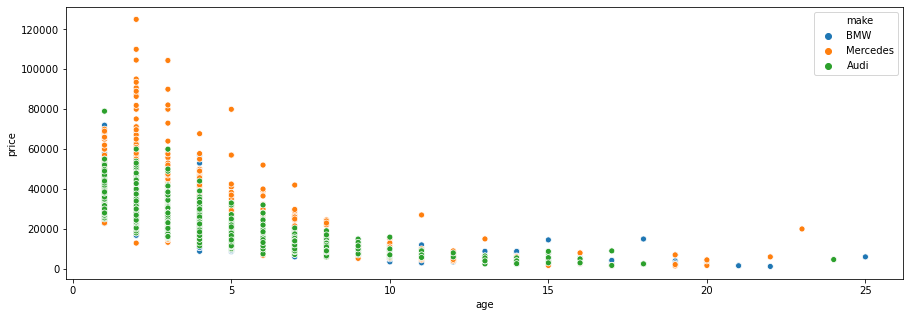

In [11]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(df["age"], df["price"], hue = df["make"])

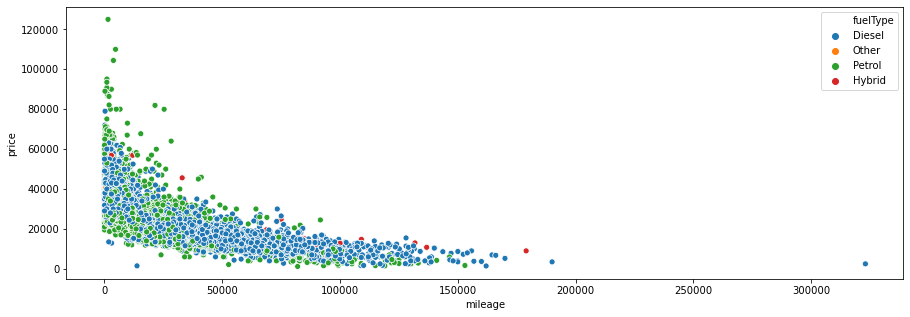

In [12]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(df["mileage"], df["price"], hue = df["fuelType"])

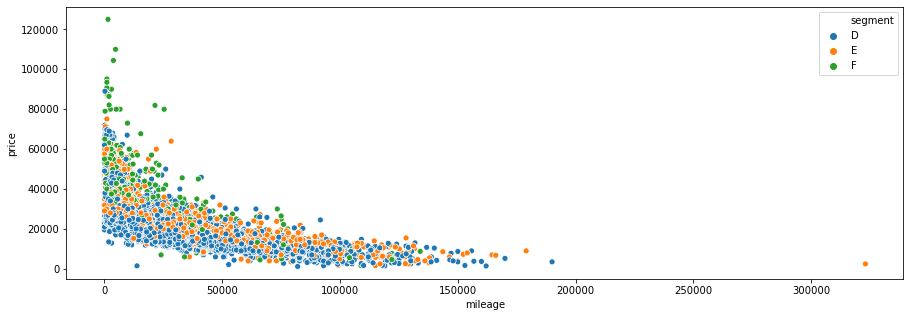

In [13]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(df["mileage"], df["price"], hue = df["segment"], hue_order = ['D','E','F'])

### Pre-processing data for modelling

#### One hot encoding

Columns such as 'transmission', 'fuelType' and 'segment' are categorical variable, therefore translated them into binary digits.

In [14]:
df_e = pd.get_dummies(df)
df_e.head()

,price,mileage,tax,mpg,engineSize,age,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,make_Audi,make_BMW,make_Mercedes,segment_D,segment_E,segment_F
0,11200,67068,125,57.6,2.0,7,1,0,0,1,0,0,0,0,1,0,0,1,0
1,16000,62794,160,51.4,3.0,5,1,0,0,1,0,0,0,0,1,0,0,1,0
2,14500,39554,160,50.4,3.0,7,1,0,0,1,0,0,0,0,1,0,0,0,1
3,14900,35309,125,60.1,2.0,5,1,0,0,1,0,0,0,0,1,0,0,1,0
4,16000,38538,125,60.1,2.0,4,1,0,0,1,0,0,0,0,1,0,0,1,0


#### Normalisation

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_e) 
df_e.loc[:,:] = scaled_values


In [16]:
df_e.head()

,price,mileage,tax,mpg,engineSize,age,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,make_Audi,make_BMW,make_Mercedes,segment_D,segment_E,segment_F
0,0.080776,0.207638,0.215517,0.234053,0.303030,0.250000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.119549,0.194406,0.275862,0.204317,0.454545,0.166667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.107432,0.122455,0.275862,0.199520,0.454545,0.250000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.110663,0.109313,0.215517,0.246043,0.303030,0.166667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.119549,0.119310,0.215517,0.246043,0.303030,0.125000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Split test & train datasets

In [17]:
from sklearn.model_selection import train_test_split

# X = df_e[['mileage']]
# y = df_e[['price']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

X = df_e.drop(columns = ['price'])
y = df_e[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8224, 18)
(3525, 18)
(8224, 1)
(3525, 1)


#### Model 1: Linear Regrssion

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model1 = LinearRegression()
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)

model1.score(X,y) #Return the coefficient of determination R square prediction.

0.7860541386278995

#### Model 2: Polynomial Regression

Useful articles about underfitting / overfitting

https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning

https://blog.naver.com/kckoh2309/222063266920

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X) 

model1 = LinearRegression() 
model1.fit(X_poly, y)
y_poly_pred = model1.predict(X_poly)

model1_rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
model1_r2 = r2_score(y,y_poly_pred)

print(model1_rmse)
print(model1_r2)

0.02522919725884703
0.905232268473845


In [27]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X) 

model1 = LinearRegression() 
model1.fit(X_poly, y)
y_poly_pred = model1.predict(X_poly)

model1_rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
model1_r2 = r2_score(y,y_poly_pred)

print(model1_rmse)
print(model1_r2)

0.02068145681465242
0.9363181201331476


In [28]:
#degree = 4

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X) 

model2 = LinearRegression() 
model2.fit(X_poly, y)
y_poly_pred = model2.predict(X_poly)

model2_rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
model2_r2 = r2_score(y,y_poly_pred)

print(model2_rmse)
print(model2_r2)

0.017878147724723414
0.9524118673885037


In [29]:
#degree = 5

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X) 

model2 = LinearRegression() 
model2.fit(X_poly, y)
y_poly_pred = model2.predict(X_poly)

model2_rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
model2_r2 = r2_score(y,y_poly_pred)

print(model2_rmse)
print(model2_r2)

0.015289414341357744
0.9651955062984588


### Overfitting?

https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning

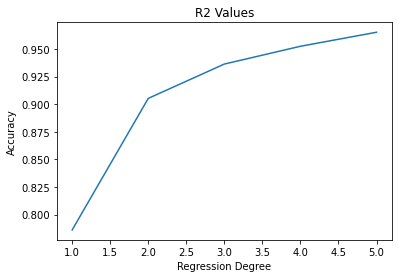

In [31]:
X = [1, 2, 3, 4, 5]
y = [0.7861, 0.9052, 0.9363, 0.9524, 0.9651]

plt.plot(X, y)
plt.title('R2 Values')
plt.xlabel('Regression Degree')
plt.ylabel('Accuracy')
plt.show()

### Conclusion

- Polynomial regression with **degree 2** provided an accurate model for predicting the used car price trend without overfitting. Used car prices are represented with a **quadratic function.**
- Polynomial regression model's accuracy (R2) = **90.52%**
- However, further analysis can be carried out by splitting data sets by 1) segment and 2) make and comparing the different models to predict which segments or makes tend to depreciate quicker.